In [1]:
# I want to get a time series of GOES radiance values for a single point without having to download all the imagery from AWS

In [6]:

import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import rasterio as rio
import os
from goespy.Downloader import ABI_Downloader # https://github.com/palexandremello/goes-py

import geoviews as gv # http://geoviews.org/
import geoviews.feature as gf
from cartopy import crs

gv.extension('bokeh', 'matplotlib')


======================================== goes-py =========================================
 A Python package can be useful to download dataset from goes satellite on AWS  0.2.1v


ModuleNotFoundError: No module named 'param'

In [4]:
def getListOfFiles(dirName):
    # create a list of file and sub directories 
    # names in the given directory 
    # https://thispointer.com/python-how-to-get-list-of-files-in-directory-and-sub-directories/
    listOfFile = os.listdir(dirName)
    allFiles = list()
    # Iterate over all the entries
    for entry in listOfFile:
        # Create full path
        fullPath = os.path.join(dirName, entry)
        # If entry is a directory then get the list of files in this directory 
        if os.path.isdir(fullPath):
            allFiles = allFiles + getListOfFiles(fullPath)
        else:
            allFiles.append(fullPath)
                
    return allFiles    

In [5]:
# AWS S3 Bucket for GOES-16
bucket = 'noaa-goes17'
# Specify date, time, product, band (channel)
year='2018'
month='12'
start_day = 11
stop_day = 12
days=np.linspace(start_day,stop_day,stop_day-start_day+1,dtype=np.int16)
hours=['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
product='ABI-L1b-RadC'
channel='C14'
# Local paths where data will be stored
path = '/home/jovyan/goes17'
filepath = []; # store filepaths of the files we download

In [8]:
# For each S3 bucket, download the corresponding observations
i = 0
for d in range(len(days)):
    for h in range(len(hours)):
        filepath.append('{}/{}/{}/{}/{}/{}/{}/'.format(path,year,month,days[d],product,hours[h],channel))
        print(filepath[i])
        if not os.path.exists(filepath[i]):
            ABI = ABI_Downloader(bucket,year,month,days[d],hours[h],product,channel)
        i+=1;

/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/01/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/02/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/03/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/04/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/05/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/06/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/07/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/08/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/09/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/10/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/11/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/12/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/13/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/14/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/15/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/16/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/17/C14/
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/18/C14/
/home/jovyan

In [24]:
file_list = getListOfFiles(filepath[0])
for f in file_list:
    print(f)

/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450047190_e20183450049563_c20183450050009.nc
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450032190_e20183450034563_c20183450035008.nc
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450057190_e20183450059503_c20183450059545.nc
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450022190_e20183450024563_c20183450025007.nc
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450027190_e20183450029503_c20183450029546.nc
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450017190_e20183450019563_c20183450020007.nc
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450052190_e20183450054563_c20183450055009.nc
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450007190_e2018345000

In [82]:
# open URL

g16 = xr.open_dataset(file_list[0])

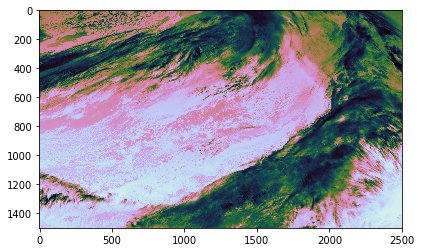

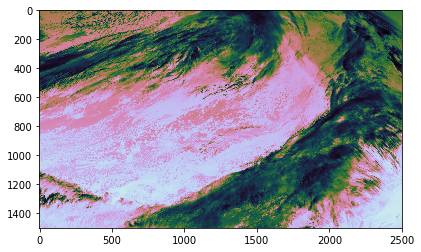

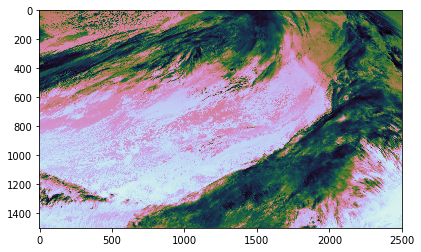

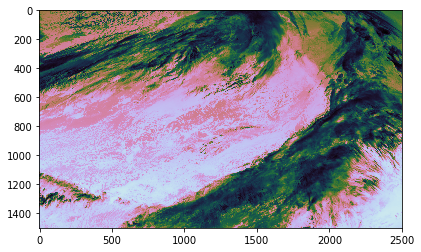

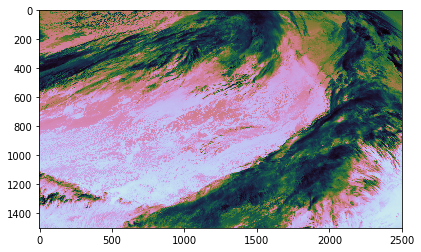

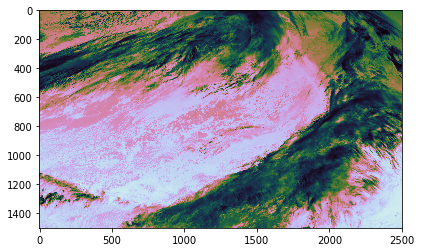

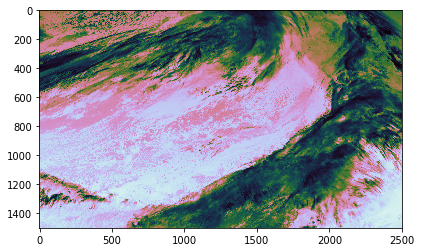

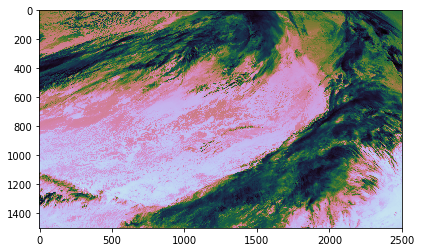

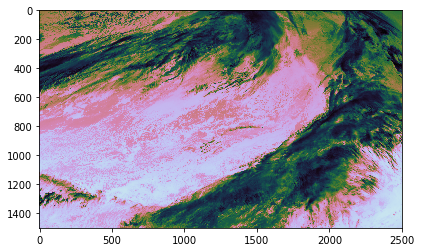

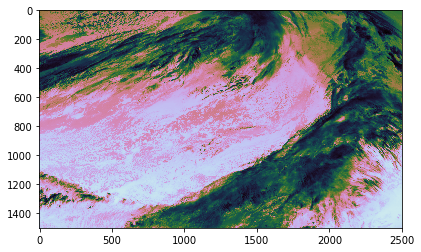

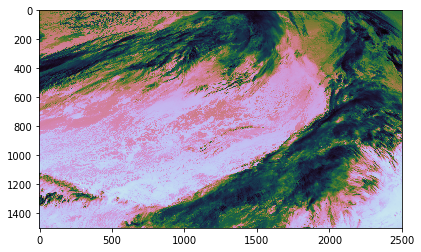

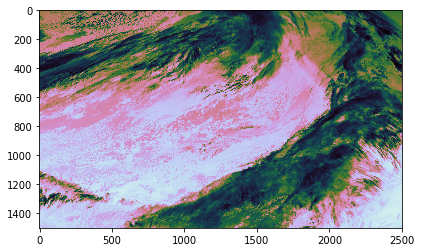

In [85]:
for filename in file_list:
    with xr.open_dataset(filename) as f:
        plt.figure(figsize=(7,4))
        plt.imshow(f.Rad,cmap='cubehelix')

In [50]:
values = []
plt.figure(figsize=(7,4))
for filename in file_list:
    print(filename)
    with xr.open_dataset(filename) as f:
        value = f.Rad[0,0].values.mean()
        values.append(value)

plt.plot(values)

/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450047190_e20183450049563_c20183450050009.nc
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450032190_e20183450034563_c20183450035008.nc
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450057190_e20183450059503_c20183450059545.nc
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450022190_e20183450024563_c20183450025007.nc
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450027190_e20183450029503_c20183450029546.nc
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450017190_e20183450019563_c20183450020007.nc
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450052190_e20183450054563_c20183450055009.nc
/home/jovyan/goes17/2018/12/11/ABI-L1b-RadC/00/C14/OR_ABI-L1b-RadC-M3C14_G17_s20183450007190_e2018345000

ImportError: cannot import name '_png'

<Figure size 504x288 with 1 Axes>

In [32]:
f = xr.open_dataset(filename)

In [48]:
x = f.Rad[0,0].values.mean()
x


70.73789

ModuleNotFoundError: No module named 'geoviews'

In [ ]:
dataset = gv.Dataset(xr.open_dataset('./data/ensemble.nc'))
ensemble = dataset.to(gv.Image, ['longitude', 'latitude'], 'surface_temperature')

gv.output(ensemble.opts(cmap='viridis', colorbar=True, fig_size=200, backend='matplotlib') * gf.coastline(),
          backend='matplotlib')